# Introduction à la Science de Données -- Master Informatique M1 AMU
# TDM4 -  Mesures de performances et matrices de confusion

Dans tout ce TDM, nous travaillons sur le jeu de données digits.

### 1. Compréhension de code et de résultats

**Cet exercice ne doit pas être intégré dans le rapport, mais il est important de le faire car il permet de comprendre et pratiquer la notion de matrice de confusion**

Lire, exécuter, et comprendre les codes ci-après.

In [2]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn import neighbors as nn
import matplotlib.pyplot as plt  # le package de visualisation
# la ligne spéciale pour que le notebook affiche comme il faut :
%matplotlib inline  

digitsData=load_digits() # jeu de données digits
X=digitsData.data # les exemples, un array numpy, chaque élément est aussi un array
y=digitsData.target # les classes
import matplotlib.pyplot as plt  # le package de visualisation
# la ligne spéciale pour que le notebook affiche comme il faut :
%matplotlib inline 

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn import neighbors as nn 
from sklearn.tree import DecisionTreeClassifier
from math import *

erreurmin = 1.
bestk = 1
for k in range(2, int(log(y.shape[0]))+1, 1):
    clf = nn.KNeighborsClassifier(k)
    erreur = 1. - cross_val_score(clf, X, y, cv=10)
    ek = erreur.mean()
    if (ek < erreurmin):
        erreurmin = ek
        bestk = k
print(erreurmin, bestk)

# Renvoie l'erreur minimale atteignable avec un classifieur des k plus proches voisins, en fonction de la meilleure valeur de k


0.02336747361887028 3


Que fait précisément le code ci-dessus ?

Comprendre et exécuter le code ci-après.

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state = 42)
classifier = nn.KNeighborsClassifier(bestk)
#classifier = DecisionTreeClassifier()
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)

In [5]:
from sklearn import metrics
print(
    f"Rapport de classification pour classifieur {classifier}:\n"
    f"{metrics.classification_report(ytest, ypred)}\n"
)

Rapport de classification pour classifieur KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.98      0.98        43
           9       0.98      0.93      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540




Commenter le résultat du rapport obtenu en interprétant la cellule ci-dessus. Est-ce que certains chiffres sont plus difficiles que d'autres à classer ? Commenter, sur la base des chiffres 1 et 9, les notions de rappel et de précision.

Les chiffres 9 et 8 semblent être un peu plus difficiles à classer par rapport aux autres.
Pour le 9, la précision est de 0.98 et le rappel de 0.93, indiquant que 7% des instances de 9 sont classées comme autre chose (faible rappel), et que parfois, ce qui est prédit comme étant un 9 ne l'est pas réellement (précision de 0.98).
Pour le 8, la précision et le rappel sont toutes deux de 0.98, indiquant quelques erreurs à la fois dans la classification des 8 et dans la classification des autres chiffres en tant que 8.

Il existe un outil d'observation des performances qui permet de savoir, pour chaque classe $c_1$ (ici, les chiffres), vers quelle autre classe $c_2$ sont classés les exemples de $c_1$ mal prédits (les FN de $c_1$). Il s'agit de la **matrice de confusion**. Inversement, cette matrice permet aussi de compter combien d'exemples sont prédits dans $c_1$ alors qu'ils sont en réallité d'une autre classe (les FP de $c_1$). Ces deux informations, pour une classe $c_1$, permettent de calculer le rappel, la précision et la $F$-mesure de $c_1$.

Le code ci-après indique comment afficher une matrice de confusion, sur la base des prédictions faites préalablement avec un $k$ plus proche voisins.

Matrice de confusion:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  1  1  0  0  1 55]]


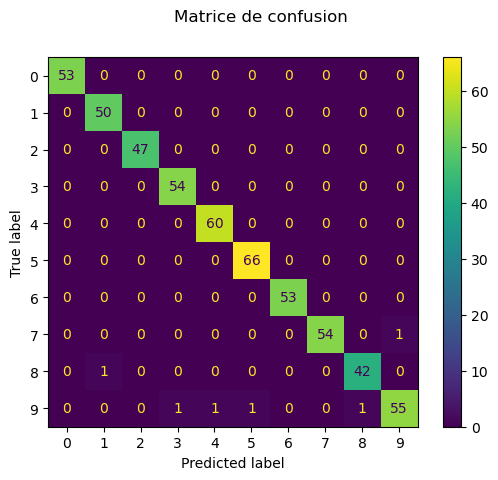

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, ypred)
disp.figure_.suptitle("Matrice de confusion")
print(f"Matrice de confusion:\n{disp.confusion_matrix}")

plt.show()

Sur tous les exemples de classe "8" dans le jeu de test, 56 sont correctement prédits. Comment sont prédits les autres ? Quel est le support (nombres d'exemples) de la classe "8" dans ce jeu de test ?

Calculer à la main (sur cette matrice) l'erreur du classifieur. Indiquer le code nécessaire pour vérifier votre calcul manuel:

In [7]:
# la somme des erreurs de predictions = la sommes des cases de la matrices qui ne sont pas dans la diagonale 
# on divise cette somme avec le nombre totale des elements de notre échatillion

disp1 = disp.confusion_matrix
# Calcul de la somme des erreurs (cases hors diagonale)
somme_erreurs = np.sum(disp1) - np.trace(disp1)

# Nombre total d'éléments dans l'échantillon
nombre_total = np.sum(disp1)

# Fraction des erreurs de prédiction
fraction_erreurs = somme_erreurs / nombre_total

print(f"Somme des erreurs de prédiction: {somme_erreurs}")
print(f"Nombre total d'éléments: {nombre_total}")
print(f"Fraction des erreurs de prédiction: {fraction_erreurs}")

# Affichage de la matrice de confusion
plt.show()


Somme des erreurs de prédiction: 6
Nombre total d'éléments: 540
Fraction des erreurs de prédiction: 0.011111111111111112


Utiliser sklearn.metrics.confusion_matrix pour afficher la version normalisée de cette matrice de confusion.

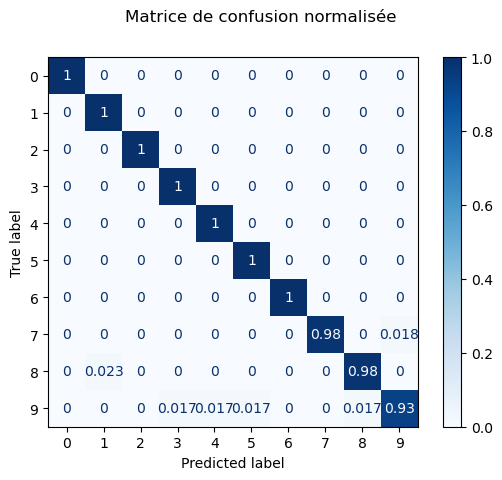

Matrice de confusion normalisée:
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.98181818 0.         0.01818182]
 [0.         0.02325581 0.         0.         0.         0.
  0.         0.         0.97674419 0.        ]
 [0.

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Normalisation de la matrice de confusion
cm_normalized = confusion_matrix(ytest, ypred, normalize='true')

# Affichage de la matrice de confusion normalisée
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
disp_normalized.plot(cmap=plt.cm.Blues)
disp_normalized.figure_.suptitle("Matrice de confusion normalisée")
plt.show()

# Afficher la matrice de confusion normalisée
print(f"Matrice de confusion normalisée:\n{cm_normalized}")


Donner le code pour calculer la matrice de confusion normalisée, moyennée sur 10 runs de hold-out 30%. 

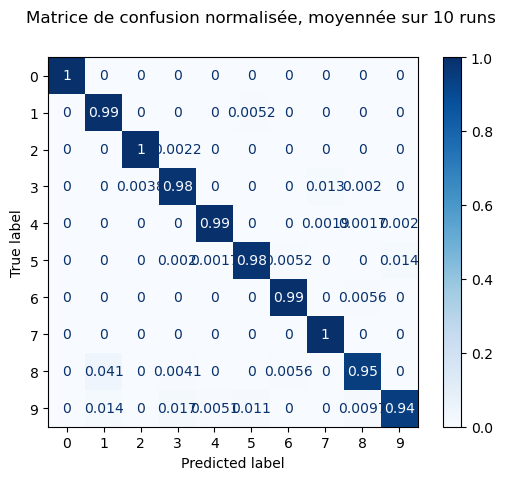

Matrice de confusion normalisée moyennée sur 10 runs:
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99484355 0.         0.         0.         0.00515645
  0.         0.         0.         0.        ]
 [0.         0.         0.99777778 0.00222222 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.00376495 0.98126604 0.         0.
  0.         0.01300822 0.00196078 0.        ]
 [0.         0.         0.         0.         0.99442829 0.
  0.         0.00188679 0.00172414 0.00196078]
 [0.         0.         0.         0.002      0.00169492 0.97703053
  0.00518547 0.         0.         0.01408908]
 [0.         0.         0.         0.         0.         0.
  0.99435382 0.         0.00564618 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.04137222 0.         0.00406071 0.         0.
  0.00556423 0

In [9]:
# Paramètres du hold-out et du modèle
n_runs = 10  # Nombre de répétitions du hold-out
test_size = 0.3  # 30% des données pour le test
model = nn.KNeighborsClassifier(n_neighbors=3)  # Modèle k-NN avec k=3

# Initialiser la matrice de confusion moyenne
avg_conf_matrix = None

for i in range(n_runs):
    # Générer une seed aléatoire différente pour chaque run
    random_seed = np.random.randint(10000)
    
    # Split Hold-Out 70% train, 30% test avec une seed différente à chaque run
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Calculer la matrice de confusion normalisée pour ce run
    cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
    
    # Ajouter à la somme de la matrice de confusion (moyennée plus tard)
    if avg_conf_matrix is None:
        avg_conf_matrix = cm_normalized
    else:
        avg_conf_matrix += cm_normalized

# Moyenne des matrices de confusion
avg_conf_matrix /= n_runs

# Afficher la matrice de confusion normalisée et moyennée
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix)
disp.plot(cmap=plt.cm.Blues)
disp.figure_.suptitle("Matrice de confusion normalisée, moyennée sur 10 runs")
plt.show()

# Afficher la matrice de confusion normalisée moyennée
print(f"Matrice de confusion normalisée moyennée sur {n_runs} runs:\n{avg_conf_matrix}")



### 2. Impact du déséquilibre sur les performances en prédiction

**Les parties 2.1. à 2.4. constituent le petit rapport à rendre, de 2 pages pdf.**

**2.1.** Comprendre ce que réalise le code ci-après: que contient le nouveau jeu de données constitué de Xunb et yunb ?

In [10]:
Xunb = X
yunb = y
iout = np.argwhere (y==8)
iout = iout[:int(iout.shape[0]*0.6)]
iout = iout.reshape((1,-1))[0]
list_itokeep = list()
for iex in range(X.shape[0]):
    if iex in iout:
        None
    else:
        list_itokeep.append(iex)
indx = np.array(list_itokeep)
Xunb = X[indx]
yunb = y[indx]
print(Xunb.shape, yunb.shape)

# xunb va correspondre à un sous ensemble de notre jeu de données avec 60 pour cent de moins de nos x correpondant a la classe 8
# yunb de meme 

(1693, 64) (1693,)


**2.2.** Produire l'affichage de la matrice de confusion d'un classifieur $30$-ppv appris/testé sur un hold-out 30%  du jeu de données (Xunb, yunb). 

Matrice de confusion:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 1  2 58  0  0  0  0  0  0  0]
 [ 0  0  1 46  0  1  0  0  0  0]
 [ 0  0  0  0 55  0  0  3  0  0]
 [ 0  0  0  0  1 54  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  0]
 [ 0  2  0  3  1  0  0  1 12  5]
 [ 0  0  0  2  0  1  0  4  1 48]]


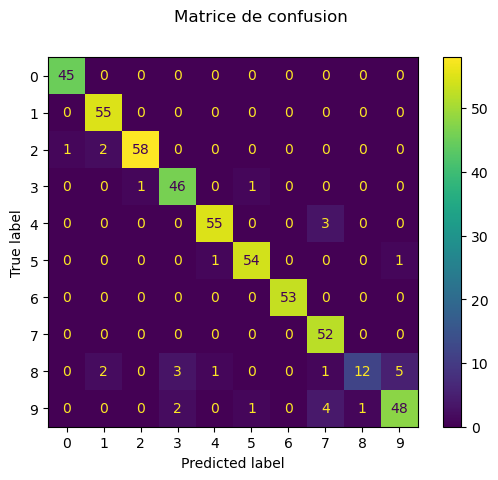

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xunb,yunb,test_size=0.3, random_state = 42)
classifier = nn.KNeighborsClassifier(30)
#classifier = DecisionTreeClassifier()
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, ypred)
disp.figure_.suptitle("Matrice de confusion")
print(f"Matrice de confusion:\n{disp.confusion_matrix}")

plt.show()


**2.3.** Comparer avec la matrice de confusion d'un classifieur $30$-ppv appris/testé sur un hold-out 30% du jeu de données (X, y): 

Matrice de confusion:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  3  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  1  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 62  1  0  0  2]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  3  0  0  0  0  0  0 40  0]
 [ 0  0  0  1  0  1  0  4  0 53]]


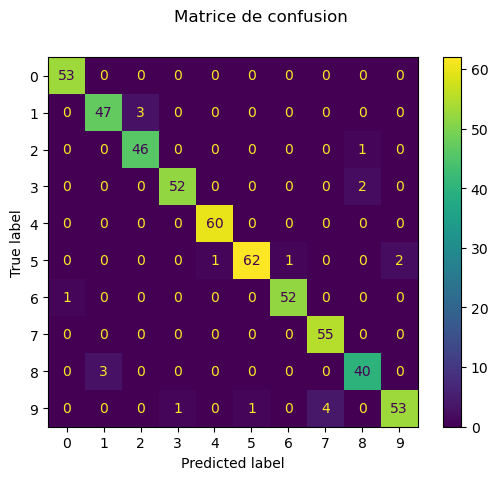

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state = 42)
classifier = nn.KNeighborsClassifier(30)
#classifier = DecisionTreeClassifier()
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, ypred)
disp.figure_.suptitle("Matrice de confusion")
print(f"Matrice de confusion:\n{disp.confusion_matrix}")

plt.show()

**2.4.** Comprendre le phénomène constaté: l'expliquer, puis proposer plusieurs pistes de solutions pour résoudre ce problème. Implanter une de ces pistes (celle qui vous semble la plus prometteuse en expliquant pourquoi).

Matrice de confusion:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  2  0]
 [ 1  2 58  0  0  0  0  0  0  0]
 [ 0  0  1 46  0  1  0  0  0  0]
 [ 0  0  0  0 55  0  0  1  2  0]
 [ 0  0  0  0  1 54  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 51  1  0]
 [ 0  0  0  1  0  0  0  0 23  0]
 [ 0  0  0  2  0  1  0  3  2 48]]


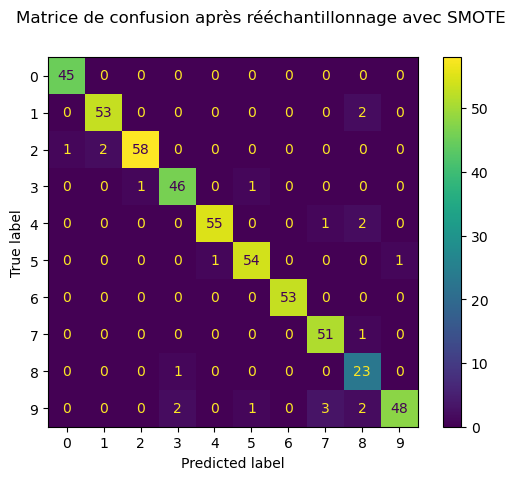

In [13]:
# Parmis les solutions possibles nous avons : 
# Ajout de données artifielles à la classe 8 pour réequilibrer nos données (on utilisera ici Smote qui va a partir des données déjà exsistantes générer de nouvelles données artificielles)
# Enlever des données des autres classes pour réequilibrer notre jeu de données 
# Utiliser des poids de classe : il existe un paramètre class_weight='balanced' pour augmenter le poid des classes minoritaires le classifieur knn ne l'a pas
# Chacune de ces trois méthodes ont des avantages et des inconvénients nous choisissons de tester la première méthode
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Séparation des données
Xtrain, Xtest, ytrain, ytest = train_test_split(Xunb, yunb, test_size=0.3, random_state=42)

# Utiliser SMOTE pour équilibrer les classes
smote = SMOTE()
Xtrain_resampled, ytrain_resampled = smote.fit_resample(Xtrain, ytrain)

# Entraîner le modèle KNN
classifier = KNeighborsClassifier(n_neighbors=30)
classifier.fit(Xtrain_resampled, ytrain_resampled)

# Prédire les résultats
ypred = classifier.predict(Xtest)

# Affichage de la matrice de confusion
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, ypred)
disp.figure_.suptitle("Matrice de confusion après rééchantillonnage avec SMOTE")
print(f"Matrice de confusion:\n{disp.confusion_matrix}")
plt.show()



**2.5.** **Optionnel.** Reproduire ces expérimentations avec d'autres chiffres, et/ou en faisant varier le degré de déséquilibre de classes, voire sur des couples de chiffres, afin d'affiner votre compréhension du phénomène. 

In [ ]:
# A vous